In [3]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
# Reading the dataset file
df = pd.read_csv("Customer_data - customer_data.csv")

In [5]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# checking for null values in the dataset
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
# Dropping all the missing rows from the dataset
df.dropna(inplace = True)

In [8]:
df.shape

(7032, 21)

In [9]:
# Getting the statistical summary for the data
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


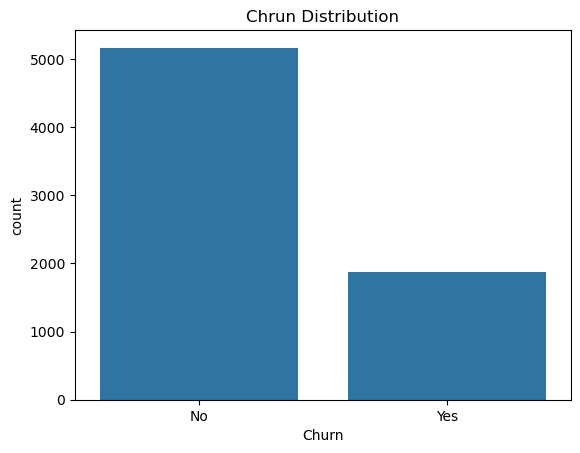

In [10]:
# Plotting a count plot to visualize the Churn Distribution
sns.countplot(x="Churn", data=df)
plt.title("Chrun Distribution")
plt.show()

In [11]:
# Convert categorical variables with "Yes/No" values numeircal 1/0
cat_cols = ["Partner", "Dependents", "PhoneService", "PaperlessBilling", "Churn"]
for col in cat_cols:
    df[col] = df[col].map({"Yes": 1, "No": 0})

In [12]:
df.shape

(7032, 21)

In [13]:
# Convert gender to numerical (male=1, female=0)
df["gender"] = df["gender"].map({"Male": 1, "Female": 0})

In [14]:
df.shape

(7032, 21)

In [15]:
# Keep SeniorCitizen as a numerical feature
df["SeniorCitizen"] = df["SeniorCitizen"].astype(int)

In [16]:
# Identify categorical variables with more than two unique values
multi_cat_cols = ["Contract", "InternetService", "PaymentMethod", "MultipleLines", "OnlineSecurity", 
                       "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]


In [17]:
# Apply one-hot encoding to multi-category variables
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=True)

In [18]:
# Feature scaling the columns
scaler = StandardScaler()
df[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(df[['tenure', 'MonthlyCharges', 'TotalCharges']])


In [19]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7032 non-null   object 
 1   gender                                 7032 non-null   int64  
 2   SeniorCitizen                          7032 non-null   int32  
 3   Partner                                7032 non-null   int64  
 4   Dependents                             7032 non-null   int64  
 5   tenure                                 7032 non-null   float64
 6   PhoneService                           7032 non-null   int64  
 7   PaperlessBilling                       7032 non-null   int64  
 8   MonthlyCharges                         7032 non-null   float64
 9   TotalCharges                           7032 non-null   float64
 10  Churn                                  7032 non-null   int64  
 11  Contract_

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,...,False,True,False,False,False,False,False,False,False,False
1,5575-GNVDE,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,...,False,False,False,True,False,False,False,False,False,False
2,3668-QPYBK,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,...,False,True,False,False,False,False,False,False,False,False
3,7795-CFOCW,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,...,False,False,False,True,False,True,False,False,False,False
4,9237-HQITU,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,...,False,False,False,False,False,False,False,False,False,False


In [20]:
# Dropping "CustomerID" columns as it is not essential for further analysis
df.drop(columns=["customerID"], inplace = True)

In [21]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,0,0,1,0,-1.280248,0,1,-1.161694,-0.994194,0,...,False,True,False,False,False,False,False,False,False,False
1,1,0,0,0,0.064303,1,0,-0.260878,-0.173740,0,...,False,False,False,True,False,False,False,False,False,False
2,1,0,0,0,-1.239504,1,1,-0.363923,-0.959649,1,...,False,True,False,False,False,False,False,False,False,False
3,1,0,0,0,0.512486,0,0,-0.747850,-0.195248,0,...,False,False,False,True,False,True,False,False,False,False
4,0,0,0,0,-1.239504,1,1,0.196178,-0.940457,1,...,False,False,False,False,False,False,False,False,False,False


In [22]:
# Modelling the algorithm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

# Split the data into features and target variable
X = df.drop(columns=["Churn"])
y = df["Churn"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [70]:
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Classification Report:\n-----------------------------------------------------")
print(classification_report(y_test, y_pred))
print("-----------------------------------------------------")

Accuracy: 0.7896233120113717
Precision: 0.6382978723404256
Recall: 0.48128342245989303
F1 Score: 0.5487804878048781
Classification Report:
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407

-----------------------------------------------------


In [24]:
# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
        	}

g_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
g_search.fit(X_train, y_train)

# Best model
best_model = g_search.best_estimator_

# Make predictions
y_pred_best = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)

print("Best Model Parameters:", g_search.best_params_)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Best Model Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.7995735607675906
Precision: 0.6666666666666666
Recall: 0.4919786096256685
F1 Score: 0.5661538461538461
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



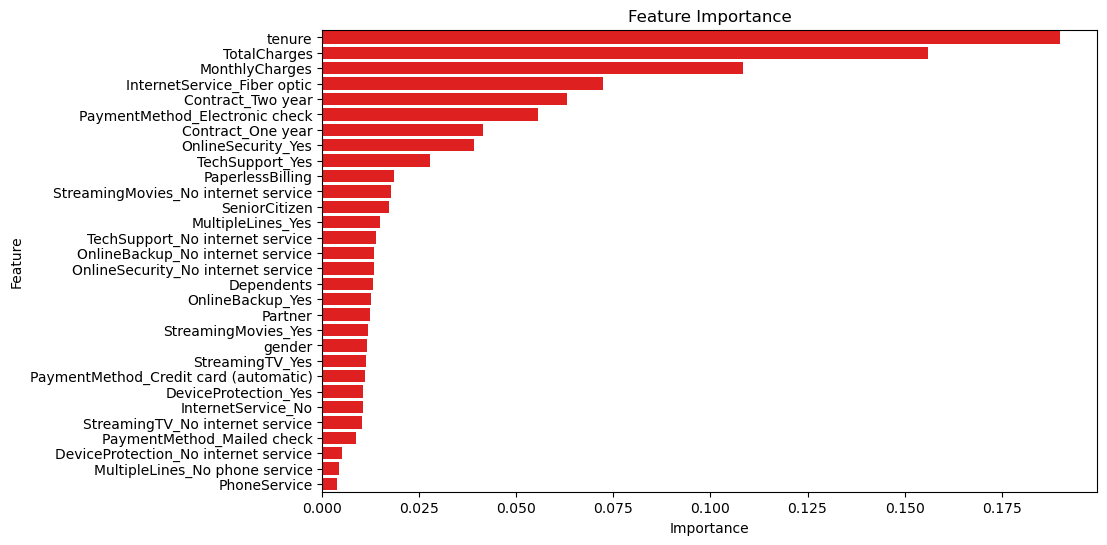

In [25]:
# Feature importance analysis
f_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
f_importance = f_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=f_importance, color="red")
plt.title('Feature Importance')
plt.show()

In [26]:
# Function to predict churn for new data
def predict_churn(new_data):
    new_data = pd.DataFrame(new_data)
    new_data[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(new_data[['tenure', 'MonthlyCharges', 'TotalCharges']])
    return best_model.predict(new_data)

# Example new customer data
new_customer = {
    'gender': [1],  
    'SeniorCitizen': [0],  
    'Partner': [1],
    'Dependents': [0],
    'tenure': [12],  
    'PhoneService': [1],  
    'PaperlessBilling': [1],  
    'MonthlyCharges': [50.0],  
    'TotalCharges': [600.0],  
    'Contract_One year': [0],  
    'Contract_Two year': [1],  
    'InternetService_Fiber optic': [1],  
    'InternetService_No': [0],  
    'PaymentMethod_Credit card (automatic)': [0],  
    'PaymentMethod_Electronic check': [1],  
    'PaymentMethod_Mailed check': [0],  
    'MultipleLines_No phone service': [0],  
    'MultipleLines_Yes': [1],  
    'OnlineSecurity_No internet service': [0],  
    'OnlineSecurity_Yes': [1],  
    'OnlineBackup_No internet service': [0],  
    'OnlineBackup_Yes': [1],  
    'DeviceProtection_No internet service': [0],  
    'DeviceProtection_Yes': [1],  
    'TechSupport_No internet service': [0],  
    'TechSupport_Yes': [1],  
    'StreamingTV_No internet service': [0],  
    'StreamingTV_Yes': [1],  
    'StreamingMovies_No internet service': [0],  
    'StreamingMovies_Yes': [1]
}

# Convert to DataFrame and predict
new_customer_df = pd.DataFrame(new_customer)
prediction = predict_churn(new_customer_df)

# Print prediction result
print("Predicted Churn:", "Yes" if prediction[0] == 1 else "No")

Predicted Churn: No


Actionable Insights:

Very high Monthly charges and Tenure:
The main contributing factors are high monthly charges and low tenure. -- Offering discounts and loyalty programs to retain the customers.

Improve the Internet Service Quality. -- Offer targeted promotions to encourage upgrades to higher-tier packages, ensuring high satisfaction with premium services.

TotalCharges and MonthlyCharges are also highly influential. Ensure pricing is competitive and transparent -- Highlighting cost-saving benefits for customers using long-term subscriptions.

s

Video Presentation Link

https://drive.google.com/file/d/1ZFMdR2ShWuJCpDeW9R0YUqEoGCQJ2E_-/view?usp=sharing